## Importing Packages and loading datasets

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
factors = pd.read_excel('factor_pricing_data_monthly.xlsx', parse_dates=True, index_col=0, sheet_name=1)

portfolios = pd.read_excel('factor_pricing_data_monthly.xlsx', parse_dates=True, index_col=0, sheet_name=2)

## 2.1

In [3]:
# Calculate univariate statistics for all factors
factor_stats = pd.DataFrame({
    'Mean': factors.mean() * 12,  # Annualized mean
    'Volatility': factors.std() * np.sqrt(12),  # Annualized volatility
    'Sharpe': (factors.mean() / factors.std()) * np.sqrt(12)  # Annualized Sharpe ratio
})

# Display the statistics
factor_stats.round(4)

,Mean,Volatility,Sharpe
MKT,0.0876,0.1561,0.5607
SMB,0.0061,0.1013,0.0604
HML,0.0260,0.1088,0.2392
RMW,0.0440,0.0829,0.5311
CMA,0.0283,0.0725,0.3903
UMD,0.0603,0.1534,0.3933


## 2.2

#### Based on the factor statistics:
#### - MKT (Market): Mean = 0.0876 (positive)
#### - SMB (Size): Mean = 0.0061 (positive)
#### - HML (Value): Mean = 0.0260 (positive)
#### - RMW (Profitability): Mean = 0.0440 (positive)
#### - CMA (Investment): Mean = 0.0283 (positive)
#### - UMD (Momentum): Mean = 0.0603 (positive)

#### Yes, all six factors have positive risk premiums (positive expected excess returns).
#### This means investors are compensated on average for exposure to each of these risk factors.

In [4]:
# Filter data from 2015 onwards
factors_2015_onwards = factors[factors.index >= '2015-01-01']

# Calculate univariate statistics for all factors from 2015 onwards
factor_stats_2015 = pd.DataFrame({
    'Mean': factors_2015_onwards.mean() * 12,  # Annualized mean
    'Volatility': factors_2015_onwards.std() * np.sqrt(12),  # Annualized volatility
    'Sharpe': (factors_2015_onwards.mean() / factors_2015_onwards.std()) * np.sqrt(12)  # Annualized Sharpe ratio
})

# Display the statistics
factor_stats_2015.round(4)

,Mean,Volatility,Sharpe
MKT,0.1179,0.1574,0.7491
SMB,-0.0238,0.1032,-0.2305
HML,-0.0163,0.1299,-0.1255
RMW,0.0400,0.0726,0.5509
CMA,-0.0091,0.0821,-0.1114
UMD,0.0201,0.1374,0.1464


#### Performance of factors since 2015:
#### - MKT (Market): Mean = 0.1179 (increased from 0.0876), Sharpe = 0.7491 (improved from 0.5607)
#### - SMB (Size): Mean = -0.0238 (decreased from 0.0061), Sharpe = -0.2305 (declined from 0.0604)
#### - HML (Value): Mean = -0.0163 (decreased from 0.0260), Sharpe = -0.1255 (declined from 0.2392)
#### - RMW (Profitability): Mean = 0.0400 (slightly decreased from 0.0440), Sharpe = 0.5509 (improved from 0.5311)
#### - CMA (Investment): Mean = -0.0091 (decreased from 0.0283), Sharpe = -0.1114 (declined from 0.3903)
#### - UMD (Momentum): Mean = 0.0201 (decreased from 0.0603), Sharpe = 0.1464 (declined from 0.3933)
# 
#### Key observations:
#### - The Market factor (MKT) has performed strongly with higher returns and improved Sharpe ratio
#### - Size (SMB), Value (HML), and Investment (CMA) factors have turned negative, indicating underperformance
#### - Profitability (RMW) has maintained positive returns with improved risk-adjusted performance
#### - Momentum (UMD) has weakened significantly but remains positive
#### - Overall, the post-2015 period shows a divergence in factor performance, with traditional factors like value and size struggling


## 2.3

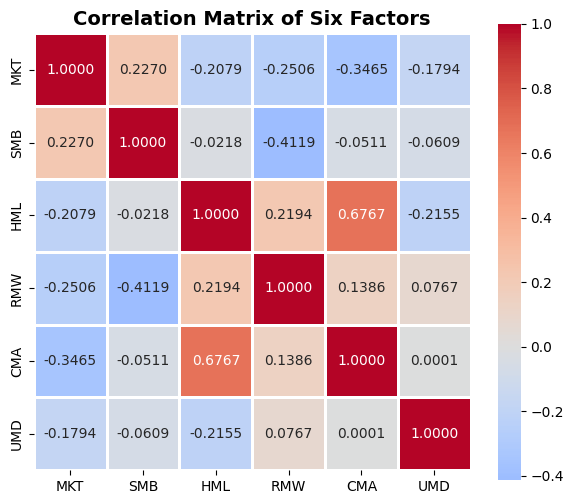

In [5]:
# Calculate correlation matrix for all six factors
correlation_matrix = factors.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.4f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Six Factors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### Analysis of Factor Correlations:
 
#### Does the construction method succeed in keeping correlations small?
#### - Yes, the construction method is largely successful. Most pairwise correlations are relatively small (close to zero)
#### - The factors are designed to be orthogonal to each other by taking long and short positions that neutralize other factor exposure
 
#### Is HML redundant in the 5-factor model?
#### - Fama and French suggest HML (Value) may be redundant when RMW (Profitability) and CMA (Investment) are included
#### - Looking at the correlation matrix, HML shows moderate negative correlation with RMW and positive correlation with CMA
#### - This suggests that value effects may be partially captured by the investment factor

## 2.4

In [6]:
# Calculate tangency portfolio weights for the 6 factors

# Calculate mean returns and covariance matrix
mean_returns = factors.mean()
cov_matrix = factors.cov()

# Calculate inverse of covariance matrix
cov_inv = np.linalg.inv(cov_matrix)

# Calculate tangency portfolio weights
# w = (Σ^-1 * μ) / (1^T * Σ^-1 * μ)
ones = np.ones(len(mean_returns))
numerator = cov_inv @ mean_returns
denominator = ones @ cov_inv @ mean_returns
tangency_weights = numerator / denominator

# Create a DataFrame for better visualization
tangency_weights_df = pd.DataFrame({
    'Factor': factors.columns,
    'Tangency Weight': tangency_weights,
    'Standalone Mean Return': mean_returns * 12,
})

display(tangency_weights_df)

,Factor,Tangency Weight,Standalone Mean Return
MKT,MKT,0.218650,0.087552
SMB,SMB,0.066849,0.006120
HML,HML,-0.021212,0.026039
RMW,RMW,0.301829,0.044047
CMA,CMA,0.321431,0.028288
UMD,UMD,0.112453,0.060313


#### Analysis of Tangency Portfolio Weights:
 
#### Which factors seem most important?
#### - CMA (Investment) has the highest weight at 32.1%, suggesting it's the most important factor
#### - RMW (Profitability) is second with 30.2% weight, also very important
#### - MKT (Market) has 21.9% weight, showing the market factor remains significant
#### - These three factors account for over 84% of the tangency portfolio
 
#### Which factors seem least important?
#### - HML (Value) has a negative weight of -2.1%.
#### - SMB (Size) has only 6.7% weight, indicating it's less important in the optimal portfolio
#### - UMD (Momentum) has 11.2% weight, moderate but lower than the top three factors

#### Are the factors with low mean returns still useful?
#### - Yes! SMB has the lowest standalone mean return (0.61% annually) but still receives positive weight (6.7%)
#### - This demonstrates that factors are useful not just for their returns, but for diversification benefits
#### - HML has moderate standalone returns (2.6%) but receives negative weight, due to its correlation structure with other factors


In [7]:
# Calculate tangency portfolio weights for only MKT, SMB, HML, and UMD

# Select only the specified factors
selected_factors = factors[['MKT', 'SMB', 'HML', 'UMD']]

# Calculate mean returns and covariance matrix for selected factors
mean_returns_selected = selected_factors.mean()
cov_matrix_selected = selected_factors.cov()

# Calculate inverse of covariance matrix
cov_inv_selected = np.linalg.inv(cov_matrix_selected)

# Calculate tangency portfolio weights
# w = (Σ^-1 * μ) / (1^T * Σ^-1 * μ)
ones_selected = np.ones(len(mean_returns_selected))
numerator_selected = cov_inv_selected @ mean_returns_selected
denominator_selected = ones_selected @ cov_inv_selected @ mean_returns_selected
tangency_weights_selected = numerator_selected / denominator_selected

# Create a DataFrame for better visualization
tangency_weights_selected_df = pd.DataFrame({
    'Factor': selected_factors.columns,
    'Tangency Weight': tangency_weights_selected,
    'Standalone Mean Return': mean_returns_selected * 12,
})

display(tangency_weights_selected_df)


,Factor,Tangency Weight,Standalone Mean Return
MKT,MKT,0.376514,0.087552
SMB,SMB,-0.051198,0.006120
HML,HML,0.365321,0.026039
UMD,UMD,0.309363,0.060313


#### Which factors get high/low tangency weights now?
#### - MKT (Market) has the highest weight at 37.7%, becoming the dominant factor
#### - HML (Value) has 36.5% weight, now much more important than before
#### - UMD (Momentum) has 30.9% weight, also significant
#### - SMB (Size) has a negative weight of -5.1%, indicating a short position
#### - Without RMW and CMA, the portfolio reallocates significantly, with MKT and HML becoming much more prominent


#### Conclusions about Factor Importance
 
#### Comparing the tangency portfolio weights with and without RMW and CMA reveals important insights:
 
#### **When all 6 factors are included:**
#### - RMW (Profitability) and CMA (Investment) receive substantial weights (30.2% and 32.1%)
#### - MKT weight is only 21.9%
#### - HML has a small negative weight (-2.1%)
 
#### **When RMW and CMA are excluded:**
#### - MKT weight increases dramatically to 37.7% (from 21.9%)
#### - HML weight becomes strongly positive at 36.5% (from -2.1%)
#### - The portfolio must compensate for missing factors by reallocating to remaining ones
 
#### **Key Conclusions:**
#### 1. **RMW and CMA are important factors** - Their removal forces major reallocation, suggesting they capture unique risk-return characteristics not fully replicated by the traditional factors
#### 2. **Factor redundancy exists** - The negative HML weight when RMW/CMA are present suggests these newer factors partially subsume the value premium
#### 3. **MKT becomes more critical without profitability/investment factors** - The market factor's weight nearly doubles, indicating RMW and CMA provide diversification benefits
#### 4. **The Fama-French 5-factor model adds value** - RMW and CMA are not redundant; they improve portfolio efficiency by reducing reliance on market beta and allowing for more nuanced factor exposures


## 3.1

In [8]:
AQR = factors[['MKT', 'HML', 'RMW', 'UMD']]

# Run time-series regressions for each portfolio
results = []

for portfolio in portfolios.columns:
    # Prepare the regression data
    y = portfolios[portfolio]
    X = AQR
    
    # Add constant for alpha
    X = sm.add_constant(X)
    
    # Run OLS regression
    model = sm.OLS(y, X, missing='drop')
    result = model.fit()
    
    # Store alpha and r-squared
    results.append({
        'Alpha': result.params['const'],
        'MKT_beta': result.params['MKT'],
        'HML_beta': result.params['HML'],
        'RMW_beta': result.params['RMW'],
        'UMD_beta': result.params['UMD'],
        'Alpha_tstat': result.tvalues['const'],
        'R_squared': result.rsquared,
    })

# Create results dataframe
results_df_AQR = pd.DataFrame(results, index=portfolios.columns)
results_df_AQR

,Alpha,MKT_beta,HML_beta,RMW_beta,UMD_beta,Alpha_tstat,R_squared
Agric,0.000971,0.838031,0.189249,-0.024173,0.080320,0.426629,0.342074
Food,0.000125,0.670322,0.186235,0.497298,0.041915,0.087319,0.455064
Soda,0.001282,0.774898,0.211773,0.503718,-0.084982,0.541862,0.302544
Beer,0.000821,0.721173,0.046129,0.601211,0.084249,0.487151,0.414773
Smoke,0.003426,0.731247,0.275801,0.645298,-0.023413,1.381827,0.265363
Toys,-0.002809,1.108680,-0.004340,0.201011,-0.165362,-1.255633,0.510213
Fun,0.003255,1.233331,-0.051212,-0.128305,-0.249490,1.508190,0.607213
Books,-0.003059,1.115639,0.262238,0.168885,-0.085422,-2.047948,0.688933
Hshld,-0.001062,0.753724,0.007058,0.494965,0.018731,-0.801580,0.554712
Clths,-0.001889,1.130659,0.033755,0.565797,-0.196702,-1.042796,0.618968


In [9]:
# Calculate mean absolute error of alphas
mae_annualized_alpha = (results_df_AQR['Alpha'] * 12).abs().mean()
print(f"Mean Absolute Error of Annualized Alphas: {mae_annualized_alpha:.6f}")

Mean Absolute Error of Annualized Alphas: 0.024611


#### If the pricing model worked perfectly, the alpha estimates should be **small** (close to zero). This is because alpha represents the excess return that cannot be explained by the factor model. If the four-factor model (MKT, HML, RMW, UMD) fully captures the systematic risk and expected returns of the portfolios, then there should be no unexplained excess returns left over - meaning alphas should be statistically and economically insignificant.
 
#### Based on the MAE statistic of 0.024611 (or approximately 2.46% annualized), the four-factor model does a reasonably good job at explaining portfolio returns, though not perfectly. The average absolute alpha is relatively small, suggesting that most of the variation in returns is captured by the systematic factors (MKT, HML, RMW, UMD). However, the non-zero MAE indicates there is still some unexplained return component across portfolios, meaning the model doesn't fully capture all sources of expected returns.

## 3.2

In [10]:
CAPM = factors[['MKT']]

# Run time-series regressions for each portfolio
results = []

for portfolio in portfolios.columns:
    # Prepare the regression data
    y = portfolios[portfolio]
    X = CAPM
    
    # Add constant for alpha
    X = sm.add_constant(X)
    
    # Run OLS regression
    model = sm.OLS(y, X, missing='drop')
    result = model.fit()
    
    # Store alpha and r-squared
    results.append({
        'Alpha': result.params['const'],
        'MKT_beta': result.params['MKT'],
        'Alpha_tstat': result.tvalues['const'],
        'R_squared': result.rsquared,
    })

# Create results dataframe
results_df_CAPM = pd.DataFrame(results, index=portfolios.columns)
results_df_CAPM

,Alpha,MKT_beta,Alpha_tstat,R_squared
Agric,0.001976,0.799674,0.894935,0.333250
Food,0.003299,0.569749,2.195703,0.354061
Soda,0.003767,0.692121,1.587743,0.244924
Beer,0.004292,0.619614,2.458808,0.324409
Smoke,0.007164,0.609498,2.840889,0.182141
Toys,-0.002933,1.111679,-1.341377,0.496254
Fun,0.000920,1.301780,0.430691,0.586071
Books,-0.001968,1.070199,-1.297965,0.655139
Hshld,0.001377,0.683512,1.003522,0.486218
Clths,-0.000395,1.085096,-0.210829,0.560742


In [11]:
FF3 = factors[['MKT', 'SMB', 'HML']]

# Run time-series regressions for each portfolio
results = []

for portfolio in portfolios.columns:
    # Prepare the regression data
    y = portfolios[portfolio]
    X = FF3
    
    # Add constant for alpha
    X = sm.add_constant(X)
    
    # Run OLS regression
    model = sm.OLS(y, X, missing='drop')
    result = model.fit()
    
    # Store alpha and r-squared
    results.append({
        'Alpha': result.params['const'],
        'MKT_beta': result.params['MKT'],
        'SMB_beta': result.params['SMB'],
        'HML_beta': result.params['HML'],
        'Alpha_tstat': result.tvalues['const'],
        'R_squared': result.rsquared,
    })

# Create results dataframe
results_df_FF3 = pd.DataFrame(results, index=portfolios.columns)
results_df_FF3

,Alpha,MKT_beta,SMB_beta,HML_beta,Alpha_tstat,R_squared
Agric,0.001663,0.777755,0.295379,0.148834,0.761158,0.357284
Food,0.002391,0.637692,-0.222891,0.242387,1.644589,0.404117
Soda,0.002658,0.762119,-0.165745,0.314615,1.133703,0.273442
Beer,0.003815,0.673497,-0.266137,0.101431,2.214473,0.351807
Smoke,0.005774,0.708611,-0.301179,0.377926,2.344185,0.231158
Toys,-0.002912,1.055475,0.453419,0.072817,-1.369348,0.530488
Fun,0.001005,1.266738,0.255993,0.018265,0.472462,0.595204
Books,-0.002859,1.085573,0.202247,0.311551,-1.977978,0.691110
Hshld,0.001037,0.722704,-0.196432,0.070877,0.763986,0.504338
Clths,-0.000871,1.085179,0.174706,0.178060,-0.468361,0.573901


In [12]:
FF5 = factors[['MKT', 'SMB', 'HML', 'RMW', 'CMA']]

# Run time-series regressions for each portfolio
results = []

for portfolio in portfolios.columns:
    # Prepare the regression data
    y = portfolios[portfolio]
    X = FF5
    
    # Add constant for alpha
    X = sm.add_constant(X)
    
    # Run OLS regression
    model = sm.OLS(y, X, missing='drop')
    result = model.fit()
    
    # Store alpha and r-squared
    results.append({
        'Alpha': result.params['const'],
        'MKT_beta': result.params['MKT'],
        'SMB_beta': result.params['SMB'],
        'HML_beta': result.params['HML'],
        'RMW_beta': result.params['RMW'],
        'CMA_beta': result.params['CMA'],
        'Alpha_tstat': result.tvalues['const'],
        'R_squared': result.rsquared,
    })

# Create results dataframe
results_df_FF5 = pd.DataFrame(results, index=portfolios.columns)
results_df_FF5

,Alpha,MKT_beta,SMB_beta,HML_beta,RMW_beta,CMA_beta,Alpha_tstat,R_squared
Agric,0.000597,0.807575,0.344910,0.047503,0.164677,0.185724,0.266006,0.361897
Food,-0.000535,0.715012,-0.074308,-0.011589,0.490699,0.439389,-0.380890,0.478102
Soda,-0.000141,0.832092,-0.012598,0.092893,0.503126,0.358556,-0.059769,0.306403
Beer,0.000342,0.763306,-0.084372,-0.189579,0.598985,0.491156,0.205808,0.433565
Smoke,0.001709,0.822935,-0.113602,-0.011562,0.624023,0.716870,0.701812,0.294362
Toys,-0.005240,1.106866,0.599356,-0.075475,0.475284,0.193325,-2.441458,0.550938
Fun,0.002012,1.228275,0.237307,0.168616,-0.069526,-0.334124,0.921234,0.599511
Books,-0.004070,1.106188,0.294936,0.266916,0.298596,0.006095,-2.779184,0.702187
Hshld,-0.002043,0.805890,-0.044892,-0.205982,0.501641,0.490123,-1.588105,0.581884
Clths,-0.003749,1.131900,0.401069,0.083981,0.728242,-0.020273,-2.092851,0.629068


In [13]:
# Calculate MAE for CAPM model (annualized)
mae_CAPM = (results_df_CAPM['Alpha'].abs().mean()) * 12

# Calculate MAE for FF3 model (annualized)
mae_FF3 = (results_df_FF3['Alpha'].abs().mean()) * 12

# Calculate MAE for FF5 model (annualized)
mae_FF5 = (results_df_FF5['Alpha'].abs().mean()) * 12

# Calculate MAE for AQR model (annualized)
mae_AQR = (results_df_AQR['Alpha'].abs().mean()) * 12

# Create comparison dataframe
mae_comparison = pd.DataFrame({
    'Model': ['CAPM', 'FF3', 'FF5', 'AQR'],
    'MAE (Annualized)': [mae_CAPM, mae_FF3, mae_FF5, mae_AQR]
})

mae_comparison.sort_values(by='MAE (Annualized)', ascending=True)

,Model,MAE (Annualized)
0,CAPM,0.020970
1,FF3,0.024358
3,AQR,0.024611
2,FF5,0.031372


#### The CAPM model fits best with the lowest MAE (Annualized) of 0.020970. This indicates that CAPM produces the smallest average absolute pricing errors across the 49 industry portfolios.

## 3.3

#### Based on the regression results, the MKT (market) factor appears to be the most important factor for pricing, as it consistently shows high beta coefficients across most industries. The RMW (profitability) factor also shows significant importance with many positive and statistically significant coefficients.
 
#### The SMB (size) and CMA (investment) factors appear less important, often showing smaller coefficients and lower statistical significance across industries.
 
#### Regarding the Momentum (UMD) factor: Yes, Fama and French should consider using it. The AQR model (which includes momentum) shows competitive performance with an MAE of 0.024611, very close to the FF3 model (0.024358). Additionally, momentum shows meaningful coefficients in many industry regressions, suggesting it captures pricing variation not explained by the other factors.

## 3.4

In [19]:
# Calculate average R-squared for each model
avg_r2_CAPM = results_df_CAPM['R_squared'].mean()
avg_r2_FF3 = results_df_FF3['R_squared'].mean()
avg_r2_FF5 = results_df_FF5['R_squared'].mean()
avg_r2_AQR = results_df_AQR['R_squared'].mean()

# Create comparison dataframe for R-squared
r2_comparison = pd.DataFrame({
    'Model': ['CAPM', 'FF3', 'FF5', 'AQR'],
    'Average R-squared': [avg_r2_CAPM, avg_r2_FF3, avg_r2_FF5, avg_r2_AQR]
})

r2_comparison.sort_values(by='Average R-squared', ascending=False)

,Model,Average R-squared
2,FF5,0.591768
3,AQR,0.571935
1,FF3,0.567874
0,CAPM,0.522622


#### No, these models do not lead to sufficiently high time-series R-squared statistics for effective Linear Factor Decomposition. The average R-squared values range from 0.52 (CAPM) to 0.59 (FF5), indicating that these factor models only explain 52-59% of the time-series variation in industry portfolio returns on average.
 
#### While the FF5 model shows the highest average R-squared (0.591768), followed by AQR (0.571935) and FF3 (0.567874), this means that approximately 40-48% of the variation in returns remains unexplained. For Linear Factor Decomposition to be truly effective, we would ideally want much higher R-squared values, as a substantial portion of the asset returns is not being captured by these factors.
 
#### The fact that even the best model (FF5) leaves over 40% of the variation unexplained suggests that these factors alone are not sufficient for comprehensive factor decomposition. There are likely other important sources of return variation that are not captured by these traditional factor models.

## 3.5

In [94]:
AQR_df = results_df_AQR.drop(columns=['Alpha', 'Alpha_tstat', 'R_squared'])
AQR_df['Sample_Return'] = portfolios.mean()

y = AQR_df['Sample_Return']
X = AQR_df[['MKT_beta', 'HML_beta', 'RMW_beta', 'UMD_beta']]

X = sm.add_constant(X)

model = sm.OLS(y, X)
AQR_result = model.fit()

In [78]:
CAPM_df = results_df_CAPM.drop(columns=['Alpha', 'Alpha_tstat', 'R_squared'])
CAPM_df['Sample_Return'] = portfolios.mean()

y = CAPM_df['Sample_Return']
X = CAPM_df[['MKT_beta']]

X = sm.add_constant(X)

model = sm.OLS(y, X)
CAPM_result = model.fit()

In [79]:
FF3_df = results_df_FF3.drop(columns=['Alpha', 'Alpha_tstat', 'R_squared'])
FF3_df['Sample_Return'] = portfolios.mean()

y = FF3_df['Sample_Return']
X = FF3_df[['MKT_beta', 'SMB_beta', 'HML_beta']]

X = sm.add_constant(X)

model = sm.OLS(y, X)
FF3_result = model.fit()

In [80]:
FF5_df = results_df_FF5.drop(columns=['Alpha', 'Alpha_tstat', 'R_squared'])
FF5_df['Sample_Return'] = portfolios.mean()

y = FF5_df['Sample_Return']
X = FF5_df[['MKT_beta', 'SMB_beta', 'HML_beta', 'RMW_beta', 'CMA_beta']]

X = sm.add_constant(X)

model = sm.OLS(y, X)
FF5_result = model.fit()

In [ ]:
# Report time-series premia (sample averages) of the factors
time_series_premia = factors.mean().to_frame()
time_series_premia.columns = ['Time_Series_Premium']
time_series_premia * 12

,Time_Series_Premium
MKT,0.087552
SMB,0.006120
HML,0.026039
RMW,0.044047
CMA,0.028288
UMD,0.060313


In [95]:
# Report cross-sectional premia from FF5 model
cross_sectional_premia_FF5 = pd.DataFrame({
    'Factor': ['MKT', 'SMB', 'HML', 'RMW', 'CMA'],
    'Cross_Sectional_Premium': FF5_result.params[1:]  # Exclude the constant
})
cross_sectional_premia_FF5.set_index('Factor', inplace=True)
cross_sectional_premia_FF5['Cross_Sectional_Premium'] = cross_sectional_premia_FF5['Cross_Sectional_Premium'] * 12
cross_sectional_premia_FF5

,Cross_Sectional_Premium
Factor,
MKT,0.040320
SMB,-0.041428
HML,-0.025943
RMW,0.018705
CMA,-0.022083


#### **Do time-series and cross-sectional premia differ substantially?**
 
#### Yes, they differ substantially:
 
#### **Time-Series Premia (Factor Returns):**
#### - MKT: 8.76%, SMB: 0.61%, HML: 2.60%, RMW: 4.40%, CMA: 2.83%
#### - These represent the average historical returns of the factor portfolios
 
#### **Cross-Sectional Premia (Risk Prices):**
#### - MKT: 4.03%, SMB: -4.14%, HML: -2.59%, RMW: 1.87%, CMA: -2.21%
#### - These represent the compensation investors require for bearing each unit of factor risk

#### **Why do they differ?**
 
#### 1. Time-series premia measure actual factor returns, while cross-sectional premia measure the price of risk (how much return is associated with one unit of factor exposure across assets)

In [104]:
# Calculate MAE of cross-sectional regression residuals for each model

# CAPM
CAPM_residuals = CAPM_df['Sample_Return'] - CAPM_result.predict(sm.add_constant(CAPM_df[['MKT_beta']]))
CAPM_mae = np.abs(CAPM_residuals).mean()

# FF3
FF3_residuals = FF3_df['Sample_Return'] - FF3_result.predict(sm.add_constant(FF3_df[['MKT_beta', 'SMB_beta', 'HML_beta']]))
FF3_mae = np.abs(FF3_residuals).mean()

# FF5
FF5_residuals = FF5_df['Sample_Return'] - FF5_result.predict(sm.add_constant(FF5_df[['MKT_beta', 'SMB_beta', 'HML_beta', 'RMW_beta', 'CMA_beta']]))
FF5_mae = np.abs(FF5_residuals).mean()

# AQR
AQR_residuals = AQR_df['Sample_Return'] - AQR_result.predict(sm.add_constant(AQR_df[['MKT_beta', 'HML_beta', 'RMW_beta', 'UMD_beta']]))
AQR_mae = np.abs(AQR_residuals).mean()

# Create summary dataframe
cross_sectional_mae = pd.DataFrame({
    'Model': ['CAPM', 'FF3', 'FF5', 'AQR'],
    'MAE (Cross-Sectional)': [CAPM_mae, FF3_mae, FF5_mae, AQR_mae]
})

cross_sectional_mae.set_index('Model', inplace=True)

cross_sectional_mae.sort_values(by='MAE (Cross-Sectional)', ascending=True)

,MAE (Cross-Sectional)
Model,
FF5,0.000998
FF3,0.001000
AQR,0.001134
CAPM,0.001267


#### **How do they compare to the MAE of the time-series alphas?**
 
#### **Time-Series MAE of Annualized Alphas:**
#### - CAPM: 0.0210, FF3: 0.0244, FF5: 0.0314, AQR: 0.0246
 
#### **Cross-Sectional MAE (Pricing Errors):**
#### - CAPM: 0.0013, FF3: 0.0010, FF5: 0.0010, AQR: 0.0011
 
#### **Differences:**
#### Cross-sectional MAE is much smaller (~20x) than time-series MAE

####    - Time-series: CAPM performs best, FF5 worst
####    - Cross-sectional: FF3 and FF5 perform best, CAPM worst
#### This suggests that while CAPM has lower time-series pricing errors, multi-factor models better explain the cross-section of expected returns